In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load parquet file into a Pandas DataFrame

In [3]:
taxi_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet')

## Display the first few rows of the dataset

In [4]:
taxi_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


## Display the shape of the dataset

In [9]:
total_rows = taxi_df.shape[0]
total_columns = taxi_df.shape[1]

# find unique columns
unique_columns = taxi_df.nunique().count()

print(f"Total number of rows: {total_rows}")
print(f"Total number of columns: {total_columns}")
print(f"Unique columns: {unique_columns}")

Total number of rows: 2463931
Total number of columns: 19
Unique columns: 19


## Check for missing values

In [13]:
print(taxi_df.isnull().sum())

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71503
trip_distance                0
RatecodeID               71503
store_and_fwd_flag       71503
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71503
airport_fee              71503
dtype: int64


## Summary statistics of the dataset

In [21]:
taxi_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.392428e+06,2392428,2392428,2.392428e+06,2.392428e+06,2.392428e+06,2.392428e+06,2.392428e+06,2.392428e+06,2.392428e+06,2.392428e+06,2.392428e+06,2.392428e+06,2.392428e+06,2.392428e+06,2.392428e+06,2.392428e+06,2.392428e+06
mean,1.697032e+00,2022-01-16 23:55:41.404787,2022-01-17 00:09:49.874682,1.389453e+00,3.099698e+00,1.415507e+00,1.659911e+02,1.637749e+02,1.230148e+00,1.280723e+01,1.034301e+00,4.913711e-01,2.368683e+00,3.748284e-01,2.966534e-01,1.902453e+01,2.282322e+00,8.249935e-02
min,1.000000e+00,2008-12-31 22:23:09,2008-12-31 23:06:56,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-4.803000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2022-01-09 14:47:08,2022-01-09 15:00:29.750000,1.000000e+00,1.030000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,4.900000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2022-01-17 10:40:17,2022-01-17 10:52:32,1.000000e+00,1.710000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2022-01-24 12:26:53.250000,2022-01-24 12:39:40.250000,1.000000e+00,3.100000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.350000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,1.975000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,2022-05-18 20:41:57,2022-05-18 20:47:45,9.000000e+00,6.510000e+02,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.659000e+01,8.888800e+02,1.933000e+02,3.000000e-01,4.010956e+05,2.500000e+00,1.250000e+00
std,4.595418e-01,NaN,NaN,9.829686e-01,4.308517e+00,5.917573e+00,6.515313e+01,7.071530e+01,4.623205e-01,2.595991e+02,1.243128e+00,8.361189e-02,2.836618e+00,1.675193e+00,4.430015e-02,2.597478e+02,7.432040e-01,3.125554e-01


## Drop rows with missing values.

In [16]:
# Drop all rows with NULL values and store the result. We'll ignore NULL valued rows in this mini-project.
taxi_df = taxi_df.dropna()

In [17]:
taxi_df.shape

(2392428, 19)

## Create a new feature that calculates the trip duration in minutes.

In [23]:
taxi_df = taxi_df.copy()
taxi_df['trip_duration_minutes'] = (taxi_df['tpep_dropoff_datetime'] - taxi_df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [24]:
taxi_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration_minutes
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333


## Create new columns for pickup hour and day of week

In [26]:
taxi_df['pickup_hour'] = taxi_df['tpep_pickup_datetime'].dt.hour
taxi_df['pickup_day_of_week'] = taxi_df['tpep_pickup_datetime'].dt.dayofweek

In [28]:
taxi_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration_minutes,pickup_hour,pickup_day_of_week
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667,0,5
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000,0,5
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667,0,5
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333,0,5
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333,0,5


## Create a lineplot displaying the number of trips grouped by pickup hour

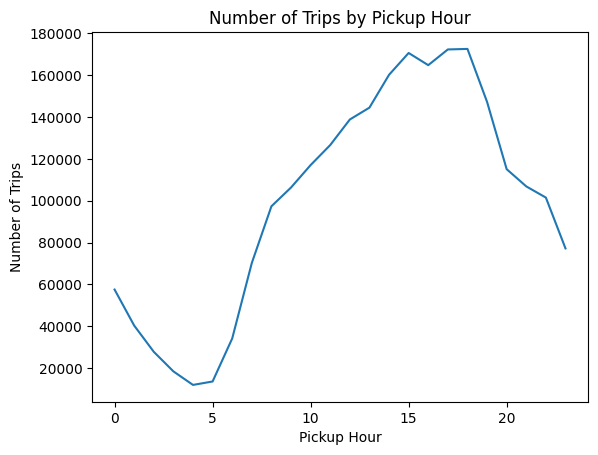

In [32]:
trips_by_hour = taxi_df.groupby('pickup_hour')['tpep_pickup_datetime'].count()
sns.lineplot(x=trips_by_hour.index, y=trips_by_hour.values)
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Pickup Hour')
plt.show()

## Create a lineplot displaying the number of trips by pickup day

Text(0, 0.5, 'Number of Trips')

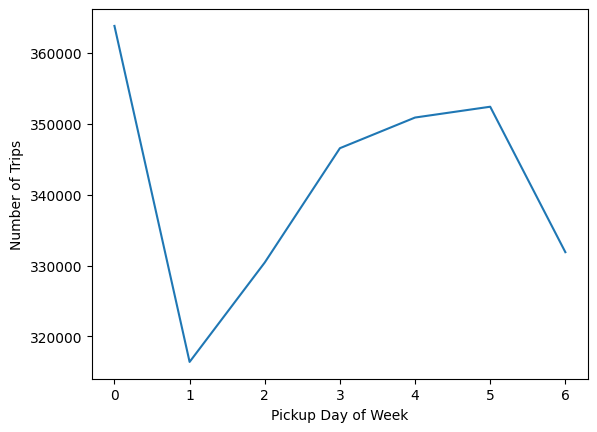

In [33]:
trips_by_day = taxi_df.groupby('pickup_day_of_week')['tpep_pickup_datetime'].count()
sns.lineplot(x=trips_by_day.index, y=trips_by_day.values)
plt.xlabel('Pickup Day of Week')
plt.ylabel('Number of Trips')

In [35]:
taxi_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee',
       'trip_duration_minutes', 'pickup_hour', 'pickup_day_of_week'],
      dtype='object')

## Compute a correlation matrix between the variables 'trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration' and use Seaborn to create a heatmap of the results. Which variables are strongly correlated?

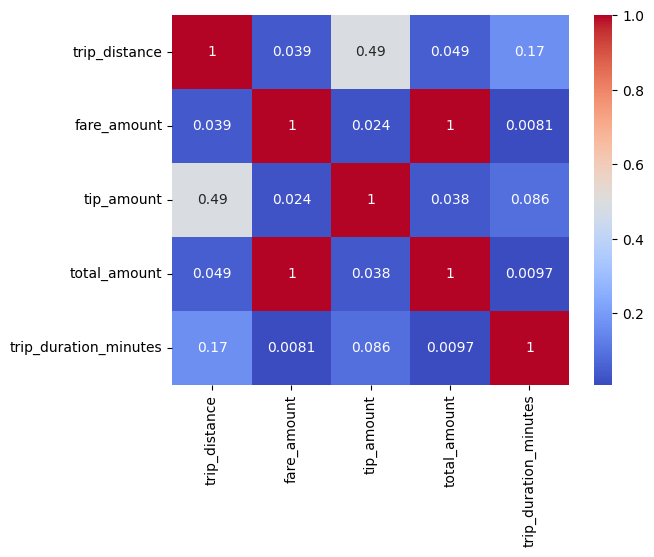

In [36]:
correlation_matrix = taxi_df[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration_minutes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Create a scatter plot matrix of numerical variables.

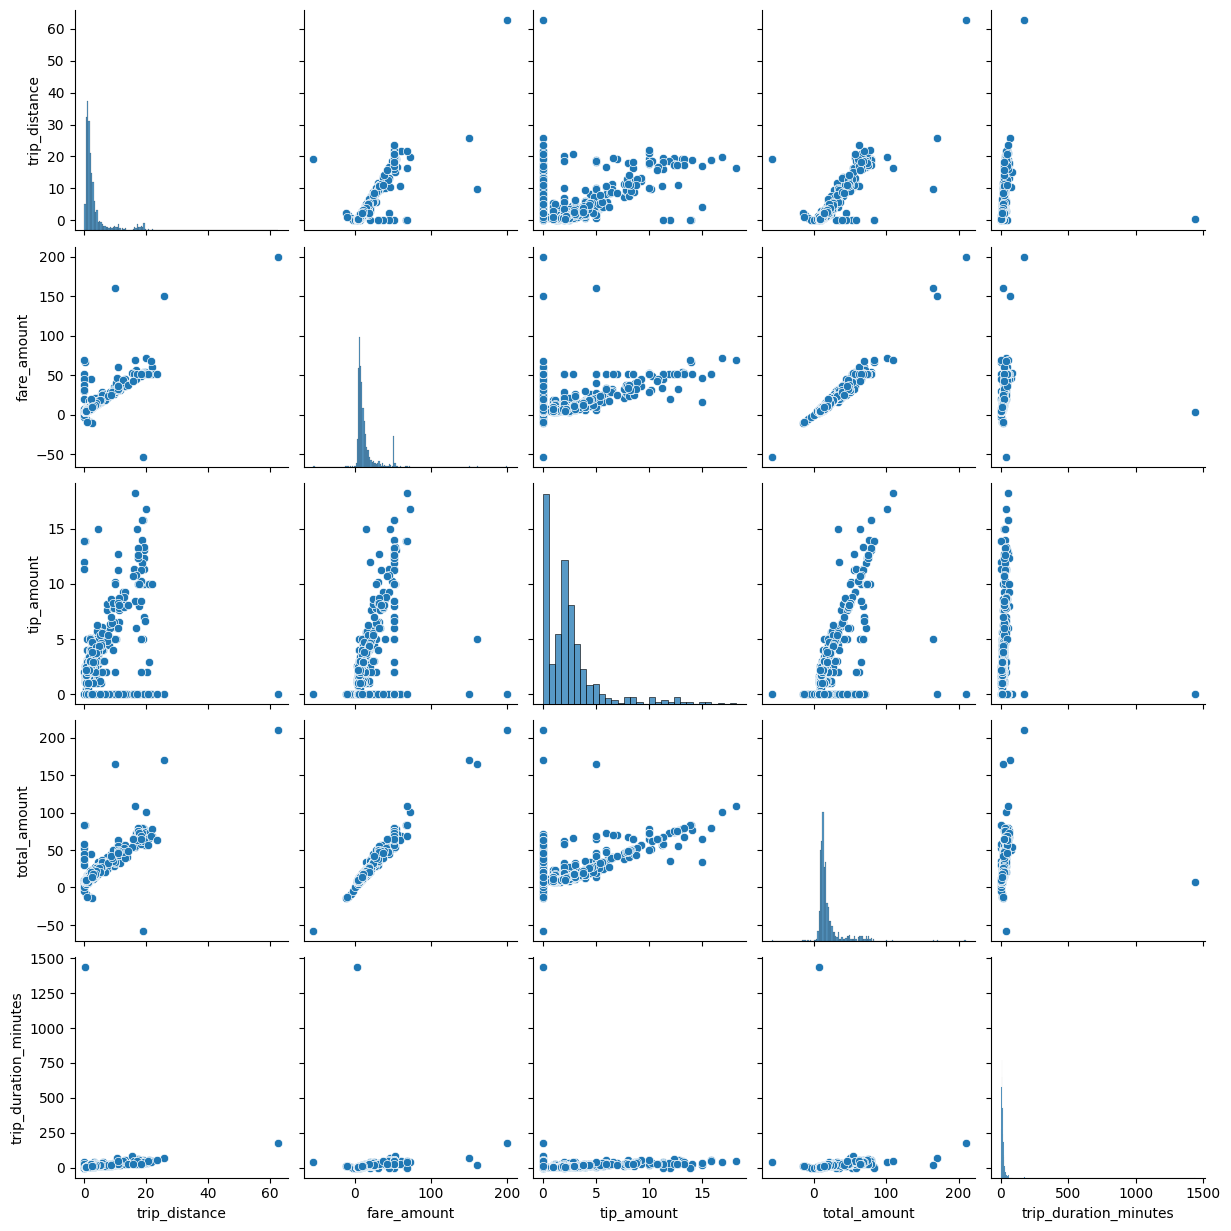

In [37]:
sns.pairplot(taxi_df.sample(1000)[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration_minutes']])
plt.show()

## Create a Seaborn countplot for PULocationID and DOLocationID. Only plot the top 15 categories by value counts.

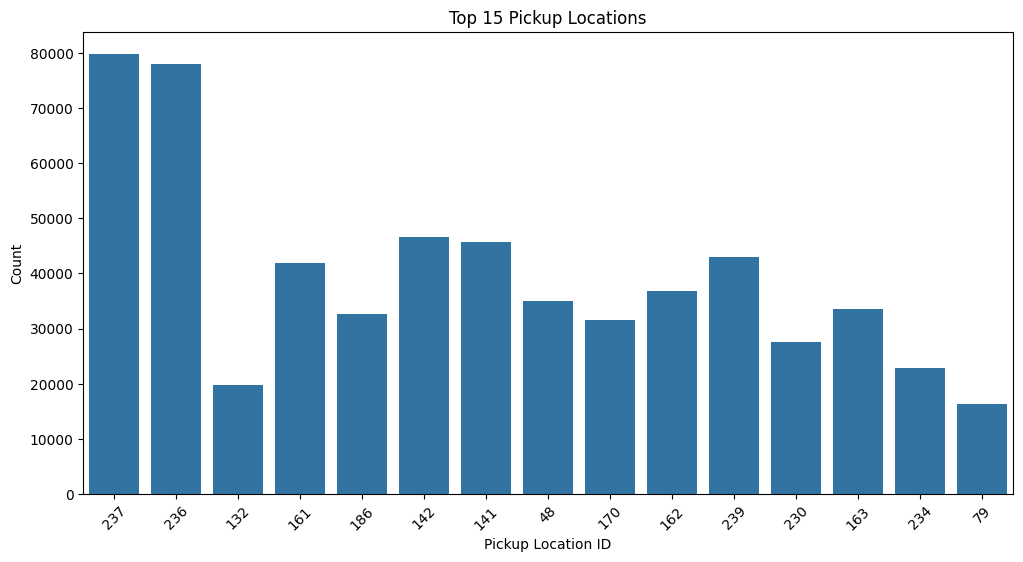

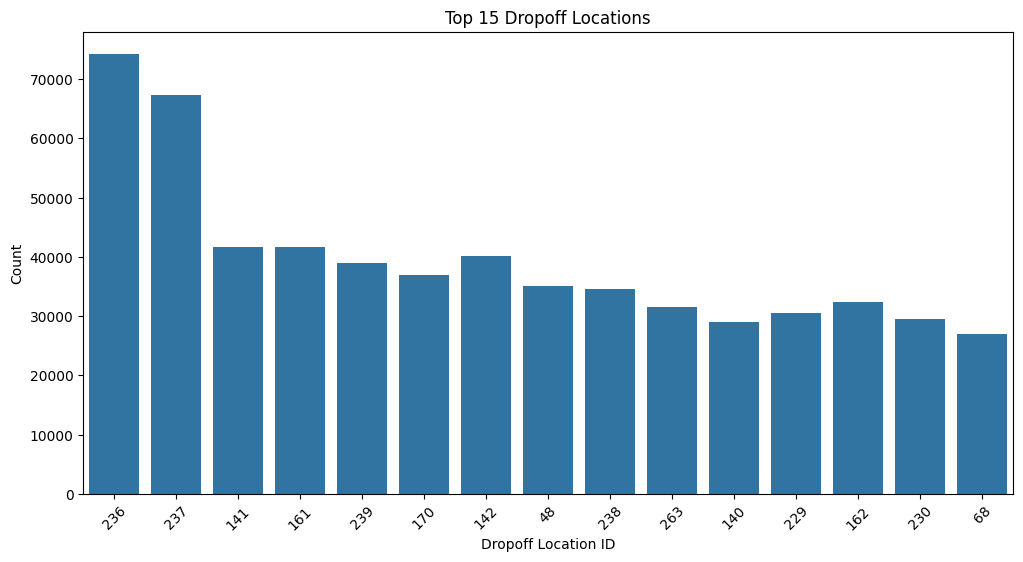

The most popular pickup location is: 237


In [41]:
# Get the top 15 pickup locations
top_15_pickup = taxi_df['PULocationID'].value_counts().nlargest(15).index

# Get the top 15 dropoff locations
top_15_dropoff = taxi_df['DOLocationID'].value_counts().nlargest(15).index

# Filter the DataFrame for the top 15 pickup and dropoff locations
filtered_df = taxi_df[taxi_df['PULocationID'].isin(top_15_pickup) & taxi_df['DOLocationID'].isin(top_15_dropoff)]

# Create the countplot for PULocationID
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='PULocationID', order=top_15_pickup)
plt.title('Top 15 Pickup Locations')
plt.xlabel('Pickup Location ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Create the countplot for DOLocationID
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='DOLocationID', order=top_15_dropoff)
plt.title('Top 15 Dropoff Locations')
plt.xlabel('Dropoff Location ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Find the most popular pickup location
most_popular_pickup = taxi_df['PULocationID'].value_counts().idxmax()
print(f"The most popular pickup location is: {most_popular_pickup}")


## Create a box plot of total amount by payment type. Do you see anything odd?

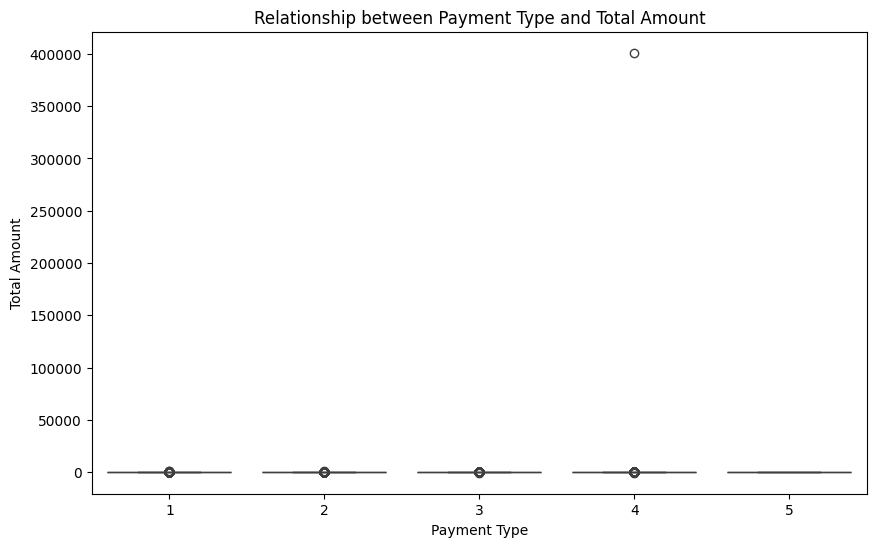

In [42]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_type', y='total_amount', data=taxi_df)
plt.title('Relationship between Payment Type and Total Amount')
plt.xlabel('Payment Type')
plt.ylabel('Total Amount')
plt.show()

## Explore data distributions for 'fare_amount', 'trip_distance' and 'extra' using Seaborn's histplot. Sample the data if you run into memory issues.
     

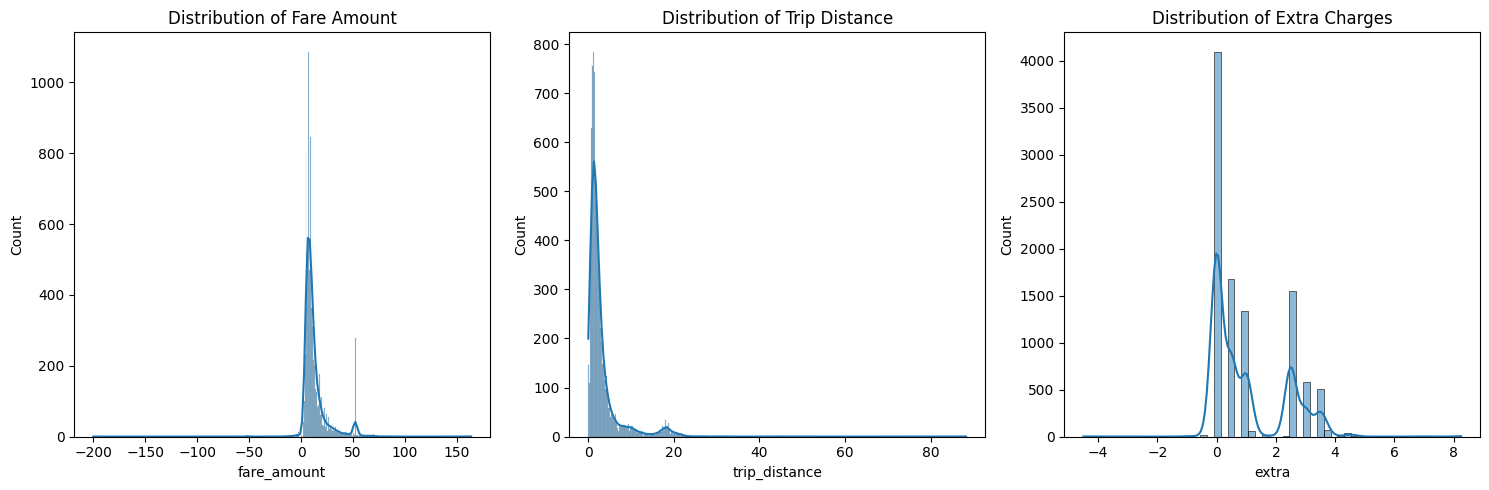

In [43]:
# Sample the data if needed
sample_size = 10000  # Adjust this based on your memory constraints
sampled_df = taxi_df.sample(n=sample_size, random_state=42)  # Use a random state for reproducibility

# Create histplots with KDE for fare_amount, trip_distance, and extra
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(sampled_df['fare_amount'], kde=True)
plt.title('Distribution of Fare Amount')

plt.subplot(1, 3, 2)
sns.histplot(sampled_df['trip_distance'], kde=True)
plt.title('Distribution of Trip Distance')

plt.subplot(1, 3, 3)
sns.histplot(sampled_df['extra'], kde=True)
plt.title('Distribution of Extra Charges')

plt.tight_layout()
plt.show()